In [0]:
#Loading the IMDB dataset
#This is a binary classification!

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring
#words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

#train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [0]:
#to decode one of the reviews back to Eng

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])


#print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i ,sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
#print(x_train[0])

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers


#defining the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


#compiling the model
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

#configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

#using custom losses and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

#we set aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#training the model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                    validation_data=(x_val, y_val))


history_dict=history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.5049 - acc: 0.7871 - val_loss: 0.3782 - val_acc: 0.8700
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2993 - acc: 0.9045 - val_loss: 0.3002 - val_acc: 0.8892
Epoch 3/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.2174 - acc: 0.9281 - val_loss: 0.3082 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1747 - acc: 0.9443 - val_loss: 0.2832 - val_acc: 0.8844
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1422 - acc: 0.9541 - val_loss: 0.2857 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1148 - acc: 0.9653 - val_loss: 0.3116 - val_acc: 0.8784
Epoch 7/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3131 - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

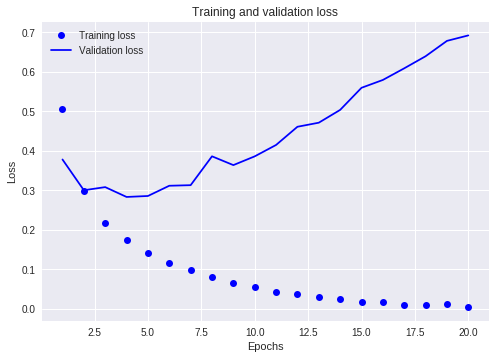

In [0]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc']
val_acc = history_dict['val_acc']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

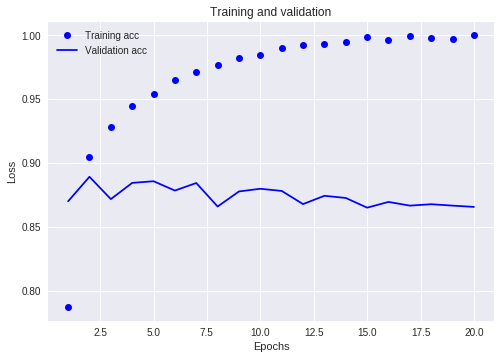

In [0]:
#plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# Retraining a model froms scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             #loss = 'mse',
              loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 118us/step - loss: 0.4592 - acc: 0.8233
Epoch 2/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.2589 - acc: 0.9113
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.1912 - acc: 0.9320
Epoch 4/4
25000/25000 [==============================] - 2s 93us/step


In [0]:
results
#we see accuracy of 88%

[0.3320099617481232, 0.87092]

In [0]:
# Use the trained network to generate predictions on new data

model.predict(x_test)

array([[0.08365817],
       [0.9938356 ],
       [0.52417326],
       ...,
       [0.06025599],
       [0.02730622],
       [0.59315985]], dtype=float32)